In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.patches as mpatches
import pandas as pd
import random

In [2]:
fnames = [
    'normal.data',
    'release.data',
    'memory-opt.data',
    'sched-opt.data',
    'preempt.data',
    'channel.data',
    'channel-preempt.data',
    'channel-preempt-100000.data'
]
data_names = {
    'normal': fnames[0],
    'release': fnames[1],
    'memory-opt': fnames[2],
    'sched-opt': fnames[3],
    'preempt': fnames[4],
    'channel': fnames[5],
    'channel-preempt': fnames[6],
    'channel-preempt-100000': fnames[7]
}

In [2]:
fname1 = 'data/normal1-no-memory-lock.txt'
fname2 = 'data/rt1-no-memory-lock.txt'
fnames = [
    'measurements-1-1.txt',
    'measurements-2-1.txt',
    'measurements-3.txt',
    'measurements-4.txt',
    'no-rt-rr-sched-10000.txt',
    'only-prio-10000.txt',
    'only-prio-100000.txt',
    'only-prio-channel-100000.txt',
    'cpp-processor.data',
    'cpp-processor-memorylock.data',
    'cpp-processor-release.data',
    'cpp-processor-release-100000.data',
    'cpp-processor-release-qos-fixes.data',
    'cpp-processor-scheduling-for-all.data',
    'cpp-processor-release-sched-for-all-100000.data',
    'cpp-processor-release-sched-for-all-reliable-100000.data'
]
data_names = {
    'normal': fnames[0],
    'nologging': fnames[1],
    'memory lock': fnames[2],
    'RR sched all 98': fnames[3],
    'RR sched 98-20': fnames[4],
    'PREEMPT_RT': fnames[5],
    'Trigger as packet 100000': fnames[6],
    'Trigger as channel 100000': fnames[7],
    'CPP processor': fnames[8],
    'CPP processor memory lock': fnames[9],
    'CPP processor release': fnames[10],
    'CPP processor release 100000': fnames[11],
    'CPP processor release qos fixes': fnames[12],
    'CPP processor release sched': fnames[13],
    'CPP processor release sched 100000': fnames[14],
    'CPP processor release sched reliable': fnames[15]
}
data_names

{'normal': 'measurements-1-1.txt',
 'nologging': 'measurements-2-1.txt',
 'memory lock': 'measurements-3.txt',
 'RR sched all 98': 'measurements-4.txt',
 'RR sched 98-20': 'no-rt-rr-sched-10000.txt',
 'PREEMPT_RT': 'only-prio-10000.txt',
 'Trigger as packet 100000': 'only-prio-100000.txt',
 'Trigger as channel 100000': 'only-prio-channel-100000.txt',
 'CPP processor': 'cpp-processor.data',
 'CPP processor memory lock': 'cpp-processor-memorylock.data',
 'CPP processor release': 'cpp-processor-release.data',
 'CPP processor release 100000': 'cpp-processor-release-100000.data',
 'CPP processor release qos fixes': 'cpp-processor-release-qos-fixes.data',
 'CPP processor release sched': 'cpp-processor-scheduling-for-all.data',
 'CPP processor release sched 100000': 'cpp-processor-release-sched-for-all-100000.data',
 'CPP processor release sched reliable': 'cpp-processor-release-sched-for-all-reliable-100000.data'}

In [3]:
def read_file(file_name):
    with open(file_name, 'r') as f:
        data = f.readlines()

        data = np.asarray(data)
        data = [float(line) / 1000 for line in data]
    return data


def format_time():
    a = datetime.datetime.now()
    return f"{a.year}-{a.month}-{a.day}_{a.hour}-{a.minute}-{a.second}"

In [4]:
violet = "#332288"
darkgreen = "#117733"
turqoise = "#44AA99"
blue = "#88CCEE"
yellow = "#DDCC77"
red = "#CC6677"
pink = "#AA4499"
green = "#90FD1F"
colors = [
    violet,
    darkgreen,
    turqoise,
    blue,
    yellow,
    red,
    pink,
    green
]

In [5]:
bin_width = 0.2
bins = [x * bin_width for x in range(0, int(10 / bin_width))][1:]

In [6]:
base_path = 'data/'

In [7]:
base_path = '/home/alqio/data/'

In [7]:
datas = {}
for fname in fnames:
    data = read_file(base_path + fname)
    print(f"{fname} len {len(data)}")

    key = [k for k, v in data_names.items() if v == fname][0]
    max_len = 10001 if len(data) < 15000 else 100001
    #max_len = 10000
    datas[key] = data[1:max_len]
datas.keys()

normal.data len 10000
release.data len 10000
memory-opt.data len 10000
sched-opt.data len 10000
preempt.data len 100000
channel.data len 10000
channel-preempt.data len 10000
channel-preempt-100000.data len 100000


dict_keys(['normal', 'release', 'memory-opt', 'sched-opt', 'preempt', 'channel', 'channel-preempt', 'channel-preempt-100000'])

In [8]:
indices = [
    'mean',
    'median',
    'std',
    'max',
    #'index of max',
    #'second max',
    #'index of second max',
    'min',
    #'index of min'
    'over_1',
    'over_1_%',
    'over_2',
    'over_2_%'
    ]
columns = ['Normal', 'PREEMPT_RT']

df = pd.DataFrame(index=indices, columns=list(datas.keys()))

for key, value in datas.items():
    largest_indices = np.argpartition(value, -2)[-2:]
    largest = value[largest_indices[1]]
    second_largest = value[largest_indices[0]]

    df[key]["mean"] = np.mean(value)
    df[key]["std"] = np.std(value)
    df[key]["median"] = np.median(value)
    df[key]["max"] = largest
    #df[key]["index of max"] = largest_indices[1]
    #df[key]["second max"] = second_largest
    #df[key]["index of second max"] = largest_indices[0]
    df[key]["min"] = np.min(value)
    #df[key]["index of min"] = np.argmin(value)

    over_1 = list(filter(lambda v: v > 1, value)) # np.extract(value > 1, value)
    over_2 = list(filter(lambda v: v > 2, value)) # np.extract(value > 2, value)

    df[key]["over_1"] = len(over_1)
    df[key]["over_1_%"] = len(over_1) / len(value) * 100
    df[key]["over_2"] = len(over_2)
    df[key]["over_2_%"] = len(over_2) / len(value) * 100


df.T

,mean,median,std,max,min,over_1,over_1_%,over_2,over_2_%
normal,0.51368,0.497,0.175558,5.749,0.189,15,0.150015,1,0.010001
release,0.480111,0.458,0.159967,1.755,0.176,14,0.140014,0,0.0
memory-opt,0.497106,0.478,0.15445,1.181,0.176,2,0.020002,0,0.0
sched-opt,0.469438,0.46,0.164366,1.872,0.174,8,0.080008,0,0.0
preempt,0.504656,0.485,0.157583,1.265,0.157,5,0.005,0,0.0
channel,3.178347,3.176,0.129045,9.157,2.837,9999,100.0,9999,100.0
channel-preempt,3.202448,3.203,0.114504,5.415,2.848,9999,100.0,9999,100.0
channel-preempt-100000,3.206834,3.207,0.120398,4.029,2.836,99999,100.0,99999,100.0


In [11]:
max(datas["channel-preempt-100000"])

4.029

In [10]:
print(datas["channel"][:20])

for i in range(0, 100000):
    v = datas["channel-preempt"][i]
    if v > 4:
        print(i, v)

[9.157, 3.854, 3.051, 3.157, 3.328, 3.091, 3.149, 3.22, 3.036, 3.198, 3.201, 3.074, 3.133, 3.231, 3.028, 3.095, 3.259, 3.085, 3.149, 3.229]
54180 4.019
61001 4.029


IndexError: list index out of range

ValueError: The 'color' keyword argument must have one color per dataset, but 13 datasets and 8 colors were provided

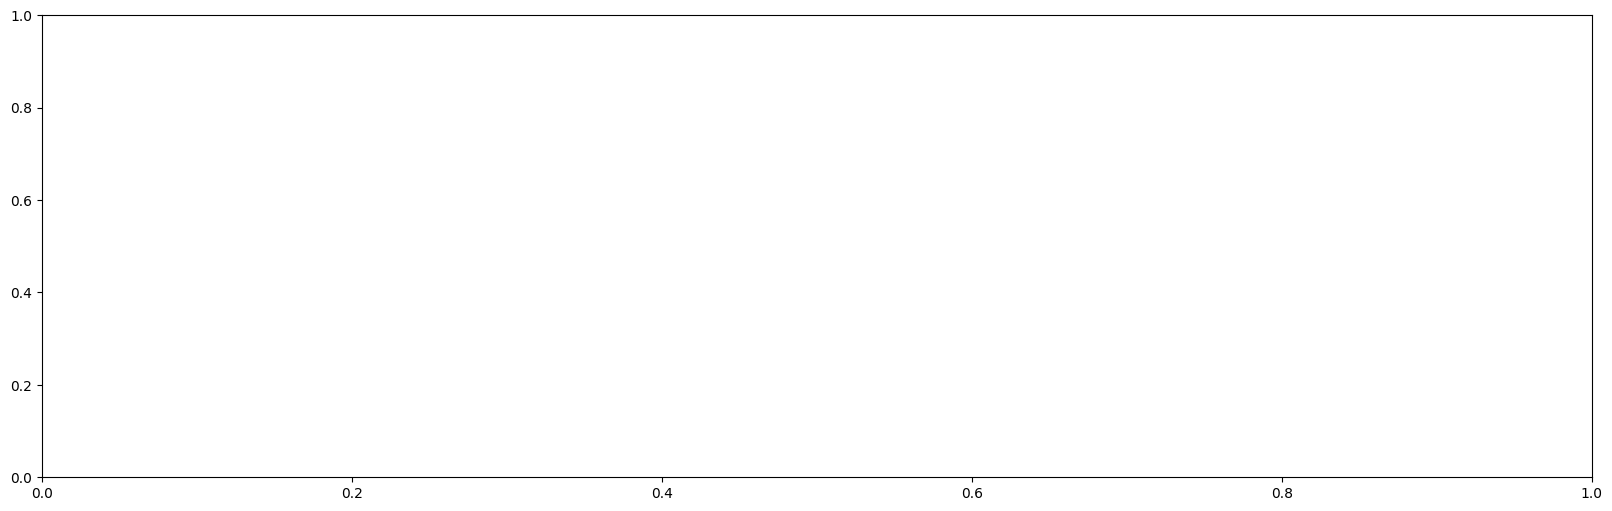

In [8]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.hist(datas.values(), label=list(data_names.keys()), color=colors[:len(datas)], alpha=1, bins=bins, log=False,
         align='left')
plt.legend(loc='upper right')
plt.xticks(bins, rotation=45)

t = format_time()
plt.savefig(f"plots/hist-{t}.svg")
plt.savefig(f"plots/hist-{t}.eps")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

n, _, patches = ax.hist(datas.values(), int(20 / 0.01), density=True, cumulative=True, histtype='step',
                        label=list(data_names.keys()), color=colors[:len(datas)])

# plt.hist(data, label=name, color=color, alpha=1, bins=bins, log=True, align='left')
plt.legend(loc='upper right')
# plt.xticks(bins, rotation=45)

#t = format_time()
# plt.savefig(f"plots/hist-{t}.svg")
# plt.savefig(f"plots/hist-{t}.eps")
plt.xlim(0, 20)
plt.show()

In [ ]:
for i, key in enumerate(data_names):
    data = datas[key]
    name = data_names[key]
    color = colors[i]
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)

    plt.hist(data, label=key, color=color, alpha=1, bins=bins, log=True, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)

    t = format_time()
    # plt.savefig(f"plots/hist-{t}.svg")
    # plt.savefig(f"plots/hist-{t}.eps")
    plt.show()


In [ ]:
for i, key in enumerate(data_names):
    data = datas[key]
    name = data_names[key]
    color = colors[i]

    fig, ax = plt.subplots(figsize=(20, 8))

    n, _, patches = ax.hist(data, int(20 / 0.01), density=True, cumulative=True, histtype='step', label=key)

    # plt.hist(data, label=name, color=color, alpha=1, bins=bins, log=True, align='left')
    # plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)

    #t = format_time()
    # plt.savefig(f"plots/hist-{t}.svg")
    # plt.savefig(f"plots/hist-{t}.eps")
    plt.xlim(0, 20)
    plt.grid(alpha=0.3)

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


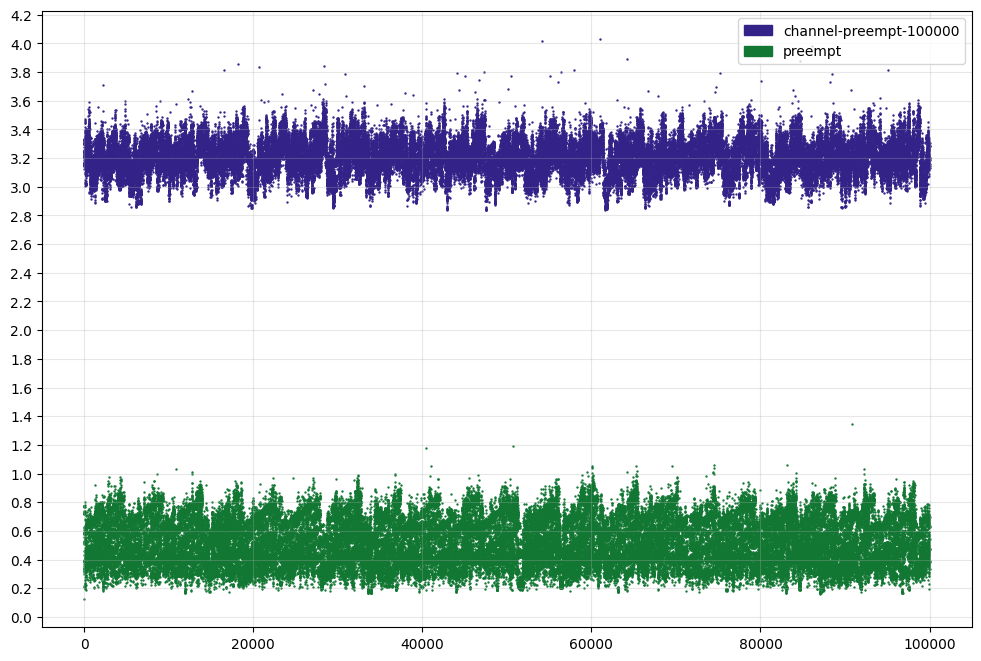

In [18]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plt.yticks([0] + bins)
plt.grid(alpha=0.3)

patches = []

d = dict(datas)
"""
d.pop('PREEMPT_RT')
d.pop('normal')
d.pop('RR sched all 98')
d.pop('RR sched 98-20')
d.pop('nologging')
d.pop('memory lock')
d.pop('Trigger as packet 100000')
d.pop('Trigger as channel 100000')
d.pop('CPP processor')
d.pop('CPP processor memory lock')
d.pop('CPP processor release')
d.pop('CPP processor release 100000')
d.pop('CPP processor release qos fixes')
d.pop('CPP processor release sched')
"""
d = {
    'channel-preempt-100000': datas['channel-preempt-100000'],
    'preempt': datas['preempt']
}


for i, key in enumerate(d):
    data = datas[key]
    plt.scatter(range(0, len(data)), data, label=key, color=colors[i], marker='.', s=2, alpha=1)
    patch = mpatches.Patch(color=colors[i], label=key)
    patches.append(patch)

#plt.ylim(0, 20)
plt.legend(loc='upper right', handles=patches)

t = format_time()
plt.savefig(f"plots/scatter-{t}.svg")
plt.savefig(f"plots/scatter-{t}.eps")
plt.show()

In [ ]:
stds = {
    'nologging': [],
    'memory lock': []
}
means = {
    'nologging': [],
    'memory lock': []
}

for j in range(0, 1000):
    bootstrapped = {
        'nologging': [],
        'memory lock': []
    }
    nolog = []
    for i in range(0, 10000):
        index = np.random.randint(0, 10000)
        nologging = datas['nologging'][index]
        bootstrapped['nologging'].append(nologging)

        index = np.random.randint(0, 9999)
        memorylock = datas['memory lock'][index]
        bootstrapped['memory lock'].append(memorylock)

    nologging_std = np.std(bootstrapped['nologging'])
    memorylock_std = np.std(bootstrapped['memory lock'])

    stds['nologging'].append(nologging_std)
    stds['memory lock'].append(memorylock_std)

    if j % 50 == 0:
        print(f'stds({j}): {stds["nologging"][-1]} {stds["memory lock"][-1]}')
        # print(f'means({j}): {means["nologging"][-1]} {means["memory lock"][-1]}')

In [ ]:
bin_width = 0.001
#bins = [x * bin_width / 10 for x in range(10, int(20 / bin_width))]
#print(bins)
for i, key in enumerate(stds):
    d = stds[key]
    color = colors[i]

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    plt.grid(alpha=0.3)
    plt.hist(d, label=key, color=color, alpha=1, log=False, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=90)

In [ ]:
for i, key in enumerate(stds):
    d = sorted(stds[key])
    color = colors[i]

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)

    # plt.scatter(d, label=key, color=color, alpha=1, bins=bins, log=False, align='left')
    plt.scatter(range(0, len(d)), d, label=key, color=colors[i], marker='.', s=1, alpha=1)
    plt.legend(loc='upper right')
    # plt.xticks(bins, rotation=90)

In [ ]:
bin_width = 0.05
bins = [x * bin_width for x in range(0, int(3 / bin_width))]
for i, key in enumerate(means):
    d = stds[key]
    color = colors[i]

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)

    plt.hist(d, label=key, color=color, alpha=1, bins=bins, log=True, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=90)

,normal,nologging,memory lock,RR sched all 98,RR sched 98-20,PREEMPT_RT,Trigger as packet 100000,Trigger as channel 100000
mean,1.159728,0.882539,0.886644,0.873422,0.636456,0.618925,0.626652,3.277236
median,0.97,0.871,0.875,0.862,0.619,0.599,0.608,3.276
std,3.864224,0.179908,0.174789,0.181117,0.182751,0.167042,0.16604,0.121266
max,343.081,2.31,2.046,2.78,2.379,2.91,2.282,6.166
min,0.583,0.492,0.411,0.438,0.27,0.265,0.264,2.913


In [56]:
print(df.to_latex(float_format="{:0.3f}".format))
print()
print(df.style.to_latex())

\begin{tabular}{lllllllll}
\toprule
{} &  normal & nologging & memory lock & RR sched all 98 & RR sched 98-20 & PREEMPT\_RT & Trigger as packet 100000 & Trigger as channel 100000 \\
\midrule
mean   &   1.160 &     0.883 &       0.887 &           0.873 &          0.636 &      0.619 &                    0.627 &                     3.277 \\
median &   0.970 &     0.871 &       0.875 &           0.862 &          0.619 &      0.599 &                    0.608 &                     3.276 \\
std    &   3.864 &     0.180 &       0.175 &           0.181 &          0.183 &      0.167 &                    0.166 &                     0.121 \\
max    & 343.081 &     2.310 &       2.046 &           2.780 &          2.379 &      2.910 &                    2.282 &                     6.166 \\
min    &   0.583 &     0.492 &       0.411 &           0.438 &          0.270 &      0.265 &                    0.264 &                     2.913 \\
\bottomrule
\end{tabular}


\begin{tabular}{lllllllll}
 & normal

/tmp/ipykernel_7779/4201227753.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(float_format="{:0.3f}".format))


In [43]:
datas["memory lock"][:10]

[0.411, 0.767, 0.962, 1.37, 0.97, 1.11, 0.7, 1.055, 1.207, 0.776]

In [29]:
len(datas["Trigger as packet 100000"])

100000